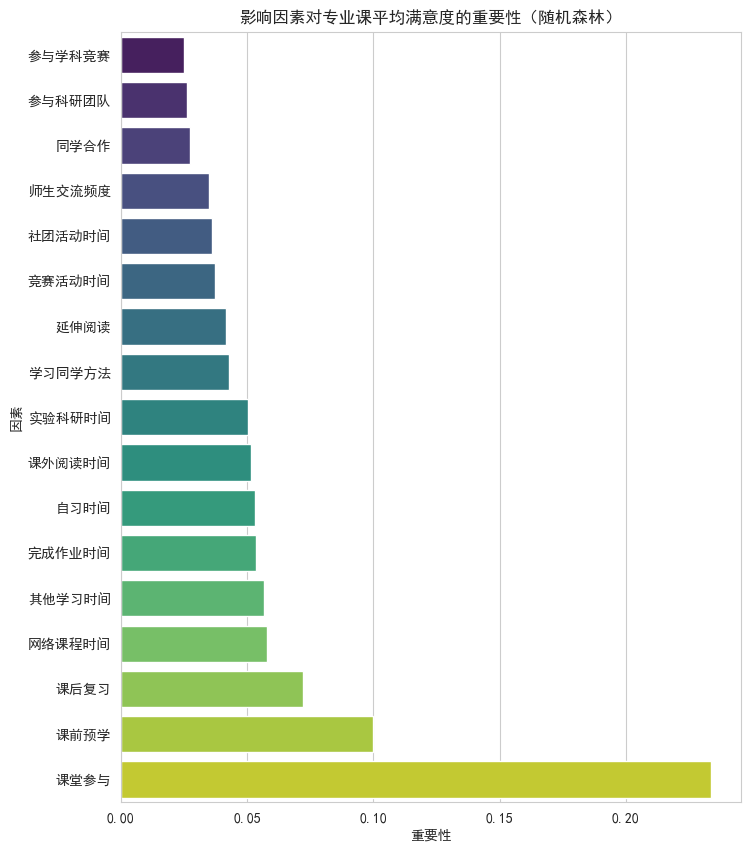

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('../../data/intermediate/初步清洗_比赛数据_2.csv', sep=',', engine='python', encoding='utf-8')

# 去除制表符
df = df.map(lambda x: x.strip('\t') if isinstance(x, str) else x)

# 专业课列
zy_cols = [
    '专业课知识融合',
    '专业课解决问题能力',
    '专业课交叉融合',
    '专业课实践结合',
    '专业课努力程度',
    '专业课前沿内容'
]

# 计算专业课平均满意度
df['专业课平均满意度'] = df[zy_cols].mean(axis=1)

# 影响因素
factors = [
    '课前预学',
    '课堂参与',
    '课后复习',
    '延伸阅读',
    '完成作业时间',
    '自习时间',
    '课外阅读时间',
    '网络课程时间',
    '实验科研时间',
    '社团活动时间',
    '竞赛活动时间',
    '其他学习时间',
    '同学合作',
    '参与科研团队',
    '参与学科竞赛',
    '学习同学方法',
    '师生交流频度'
]

# 特征和目标
X = df[factors]
y = df['专业课平均满意度']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 获取特征重要性
importances = rf.feature_importances_
importance_df = pd.DataFrame({'因素': factors, '重要性': importances})

# 排序
importance_df = importance_df.sort_values(by='重要性', ascending=True)

# 可视化
plt.figure(figsize=(8, 10))
# Corrected barplot
sns.barplot(x='重要性', y='因素', data=importance_df, hue='因素', dodge=False, palette='viridis', legend=False)
plt.title('影响因素对专业课平均满意度的重要性（随机森林）')
plt.show()
